<a href="https://colab.research.google.com/github/WaxXaa/CNN_Classification_model/blob/main/MNIST_digits_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

se importan las librerias

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

se cargan las imagenes

In [ ]:
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist_dataset.load_data()
x_train.ndim
x_train.shape

(60000, 28, 28)

array para guardar los nombres de las etiquetas de las imagenes

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

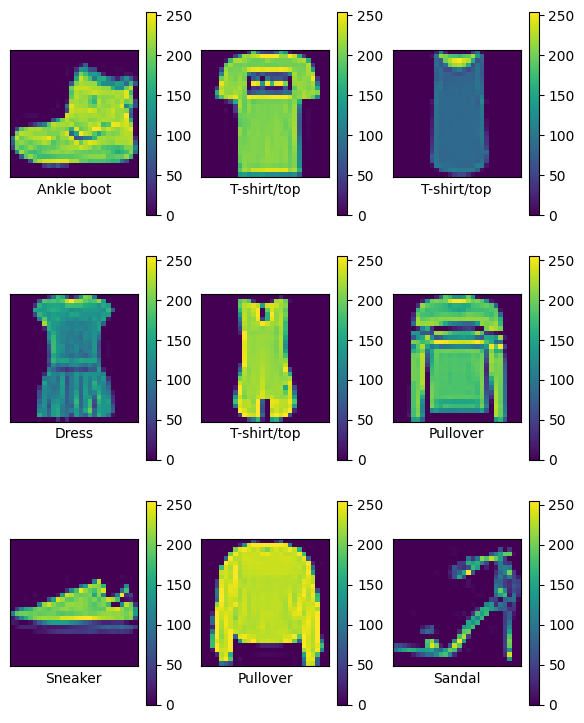

In [ ]:
plt.figure(figsize=(7,9))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
  plt.colorbar()
plt.show()

normalizacion de los datos

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


ahora creamos un modelo secuencial, que es una arquitectura de NN que apila una capa tras otra, asi la salida de una capa se convierte en la entrada de la siguiente

In [ ]:
model = tf.keras.Sequential()

la arcquitectura de la red consiste de una 6 capas
- Conv2d 28 x 28, activacion Gelu y 10 filtros de 3 x 3
- Maxpooling de 2 X 2 y strides de 2 x 2
- Cond2d 28 x 28, activacion Relu y 30 filtros de 5 x 5
- Flatten
- Dense con units 10 y softmax como ultima capa de clasificacion

In [ ]:
model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1),activation= 'relu', filters= 10, strides=(1,1), kernel_size=(3,3), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(activation= tf.keras.activations.relu, filters= 15, strides=(1,1), kernel_size=(5,5), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 15)        3765      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 7, 7, 15)          0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 735)               0         
                                                                 
 dense_33 (Dense)            (None, 256)             

compilacio del modelo
- adam
- Sparse Categorical Crossentropy
- metricas de accuracy

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Accuracy()])

ahora entrenamos el modelo

In [ ]:
x_train.shape
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:

model.fit(x_train,
         y_train_one_hot,
         batch_size=64,
         epochs=50)

Epoch 1/50
938/938 [==============================] - 26s 28ms/step - loss: 0.2870 - accuracy: 0.0000e+00
Epoch 2/50
938/938 [==============================] - 26s 28ms/step - loss: 0.2682 - accuracy: 0.0000e+00
Epoch 3/50
938/938 [==============================] - 26s 28ms/step - loss: 0.2522 - accuracy: 0.0000e+00
Epoch 4/50
938/938 [==============================] - 28s 30ms/step - loss: 0.2390 - accuracy: 0.0000e+00
Epoch 5/50
938/938 [==============================] - 26s 27ms/step - loss: 0.2271 - accuracy: 0.0000e+00
Epoch 6/50
938/938 [==============================] - 26s 28ms/step - loss: 0.2161 - accuracy: 1.6667e-06
Epoch 7/50
938/938 [==============================] - 26s 28ms/step - loss: 0.2070 - accuracy: 2.3333e-05
Epoch 8/50
938/938 [==============================] - 27s 29ms/step - loss: 0.1987 - accuracy: 8.3333e-05
Epoch 9/50
938/938 [==============================] - 26s 28ms/step - loss: 0.1915 - accuracy: 1.4167e-04
Epoch 10/50
938/938 [=========================

In [ ]:
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot, verbose=0)

In [ ]:
print('accuracy: ', test_acc)

accuracy:  0.10897000133991241


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

1/1 [==============================] - 0s 83ms/step
[[0.08533674 0.08533674 0.23196931 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]
Pullover


<function matplotlib.pyplot.show(close=None, block=None)>

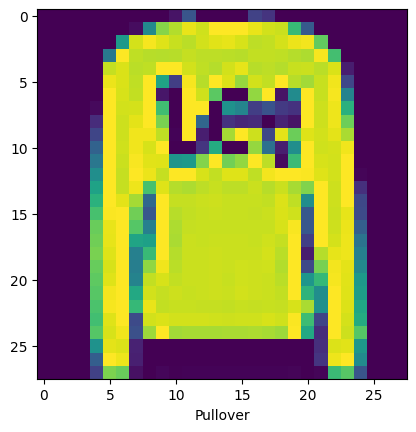

In [ ]:
img = np.expand_dims(x_test[1], 0)
single_prediction = probability_model.predict(img)
print(single_prediction)
print(class_names[np.argmax(single_prediction)])
plt.figure()
plt.imshow(x_test[1])
plt.xlabel(class_names[y_test[1]])
plt.show

In [ ]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
predictions[1]

array([0.08533674, 0.08533674, 0.23196933, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

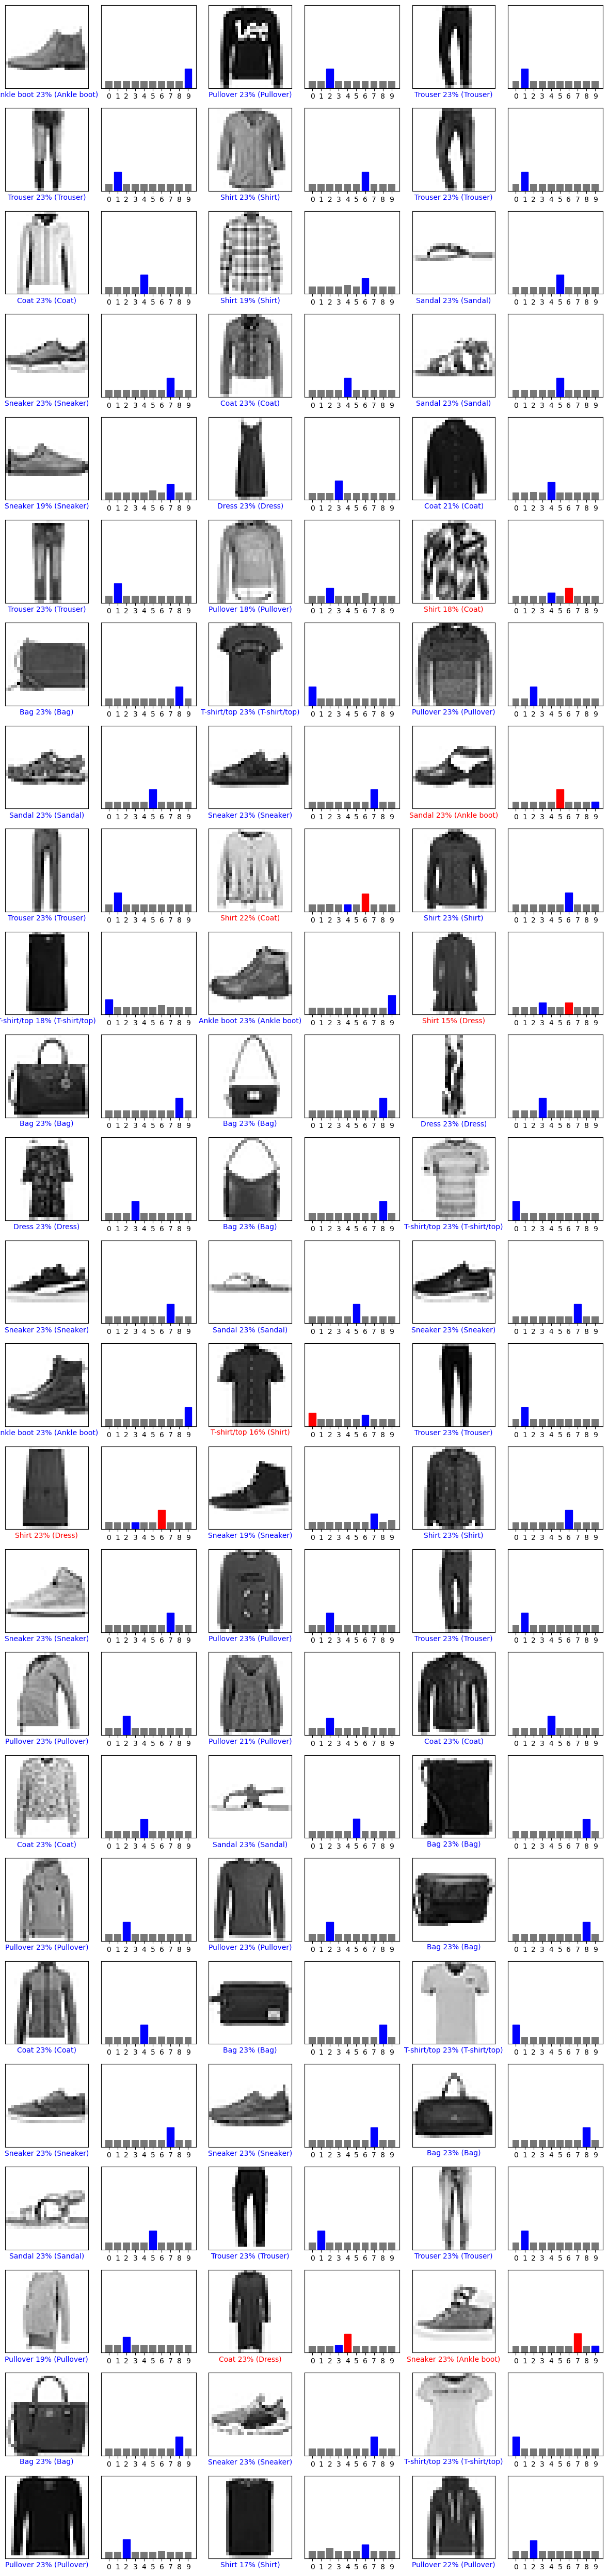

In [ ]:
#@title predicciones de las primeras 25
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
num_rows = 25
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()